# Project Title: Diabetes Prediction - SVM  Random Forest

## Group Number: 12

### Group Members:

1. Kheminda D.A.J.P. - Registration Number: EG/2019/3636
2. Kumarasinghe K.A.G.T.V - Registration Number: EG/2019/3645

# Diabetes Prediction System

## Import Required Dependencies

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

## Dataset

In [163]:
# laod the diabetes dataset
diabetes_dataset = pd.read_csv('diabetes.csv')

# print first 5 data rows in the dataset
diabetes_dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [164]:
# to check the number of columns and rows in the dataset
diabetes_dataset.shape

(768, 9)

In [165]:
# Getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Dataset colums

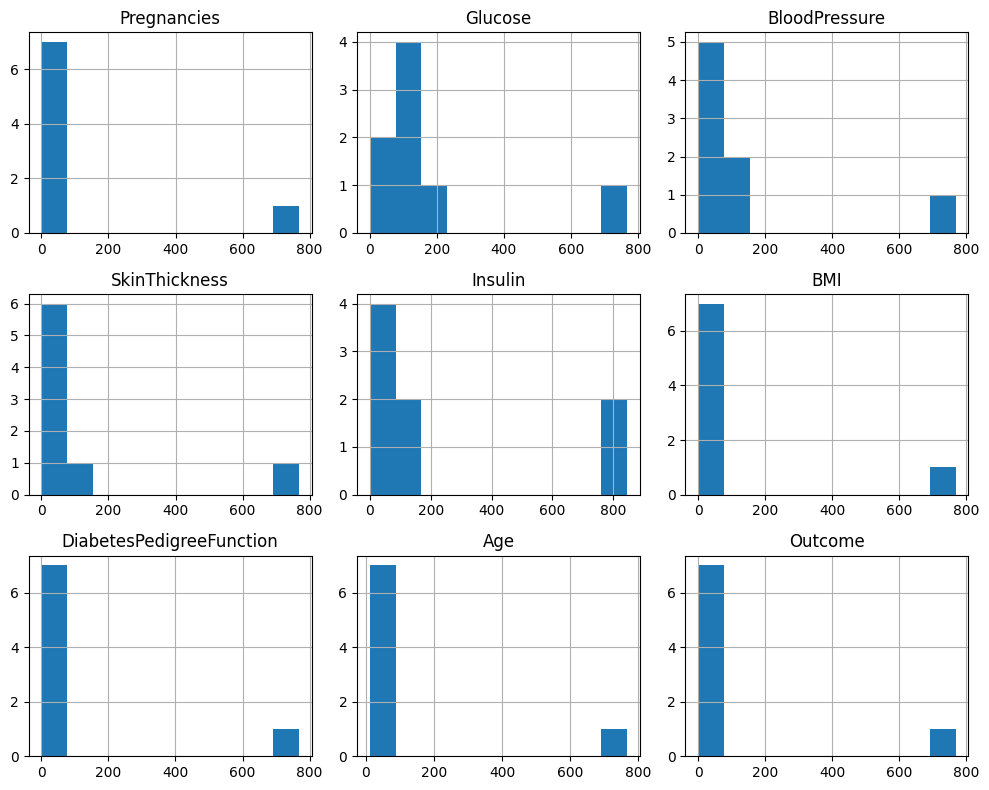

In [166]:
# data analysis and visualization to get a quick overview of the distribution of data


diabetes_dataset.describe().hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [167]:
# to get idea about lables in Target Variable
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

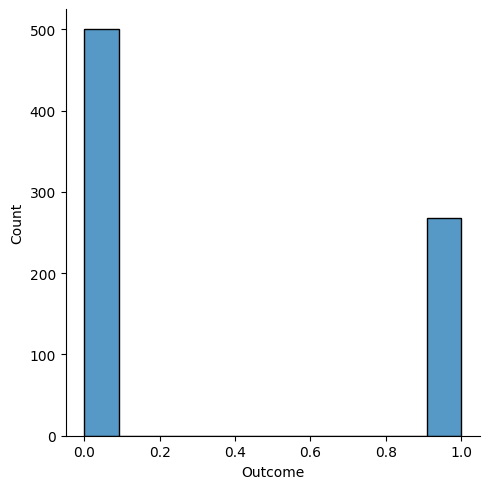

In [168]:
#Visualization to get idea about lables in Target Variable
import seaborn as sns
sns.displot(diabetes_dataset['Outcome'])

0 - Non diabetic
1 - diabetic

In [169]:
# Mean values of the colums
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


## Data Preprocessing

### Handling null / missing values

In [170]:
#view dataframe summary
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [171]:
#Checking the null values
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0, 0.5, 'Count')

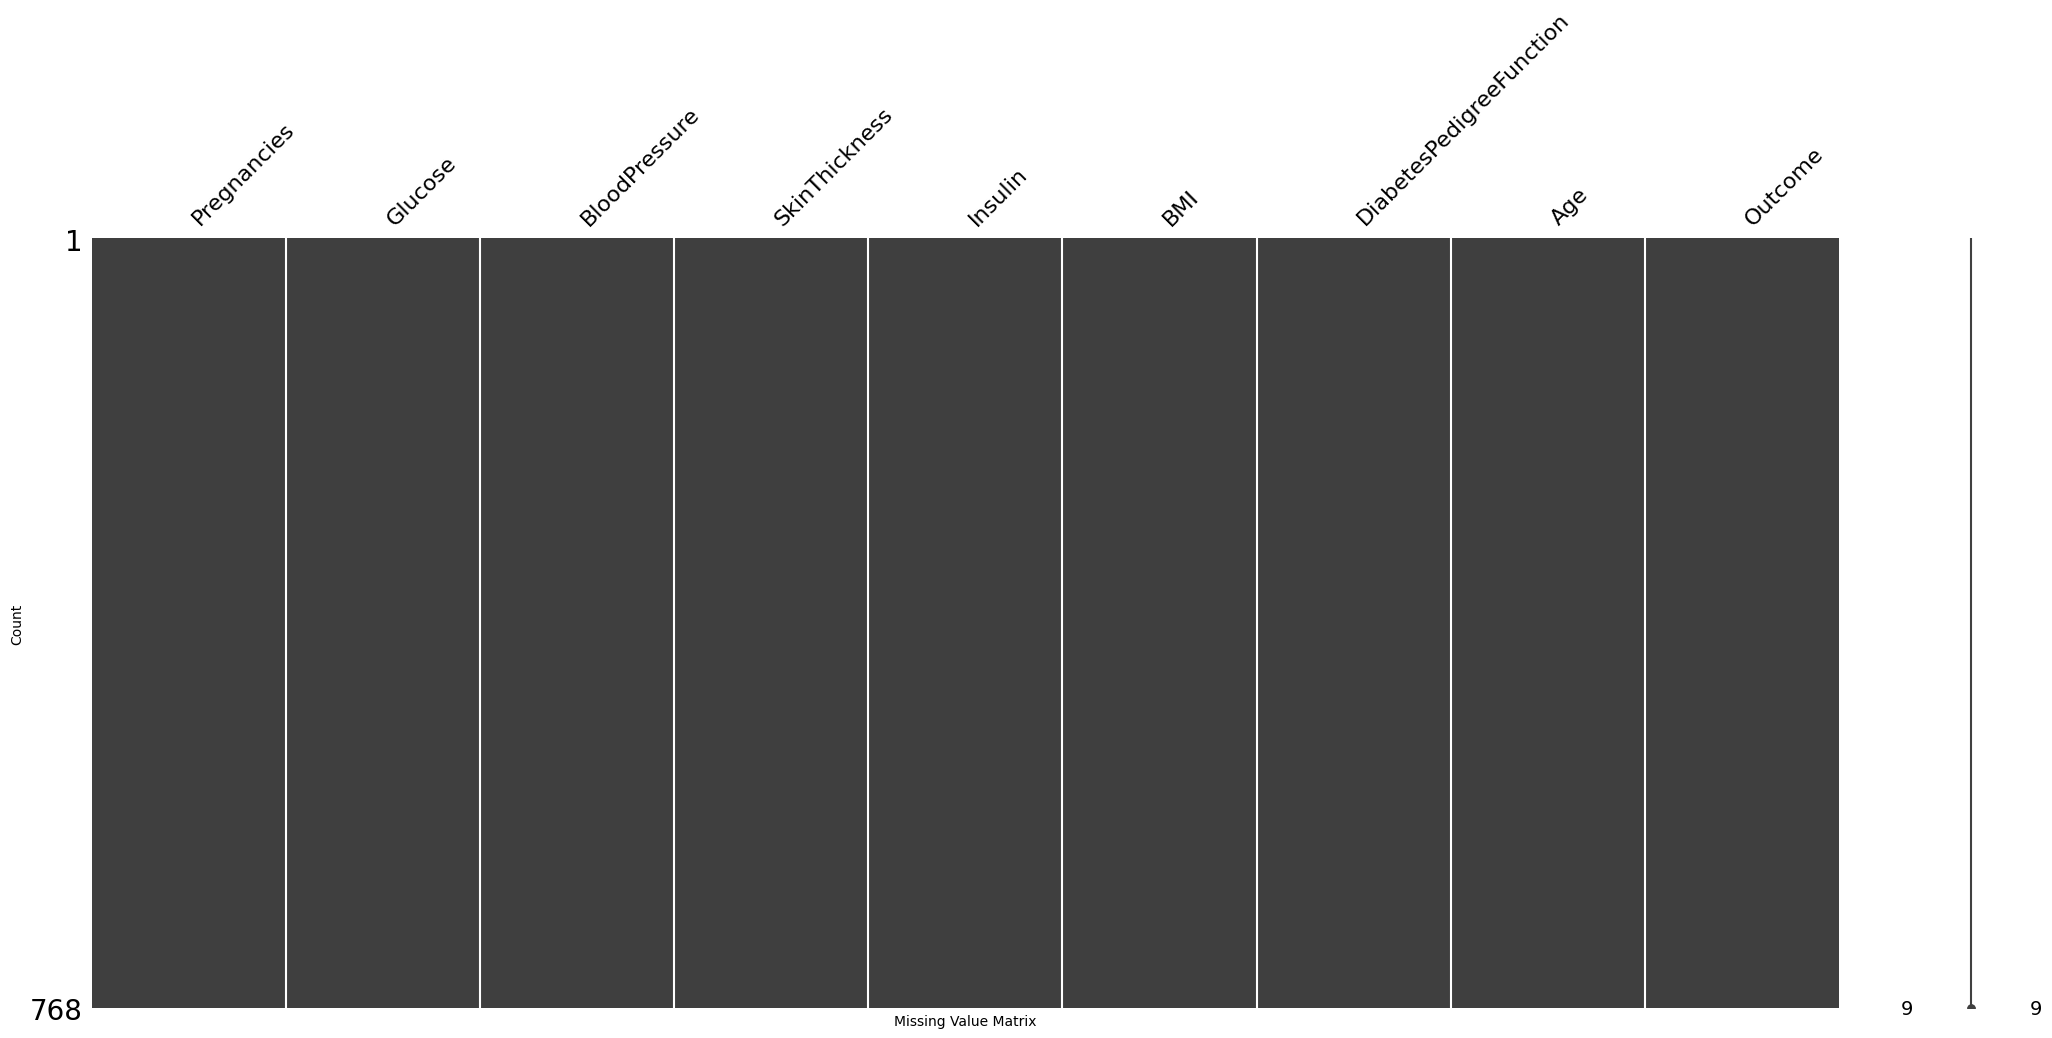

In [172]:
#Visualizing Missing data
!pip install missingno
import missingno as msno
msno.matrix(diabetes_dataset)
plt.xlabel("Missing Value Matrix")
plt.ylabel("Count")

So, there is no any missing values in the dataset

### Handling duplicated values

In [173]:
# Check for duplicated values
duplicated_rows = diabetes_dataset.duplicated()

# Display rows with duplicated values
duplicated_data = diabetes_dataset[duplicated_rows]
print("Duplicated Rows:")
print(duplicated_data)

Duplicated Rows:
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


So, there is no any duplicated data

### Handling Outliers

#### Detect outliers using Box-Plot

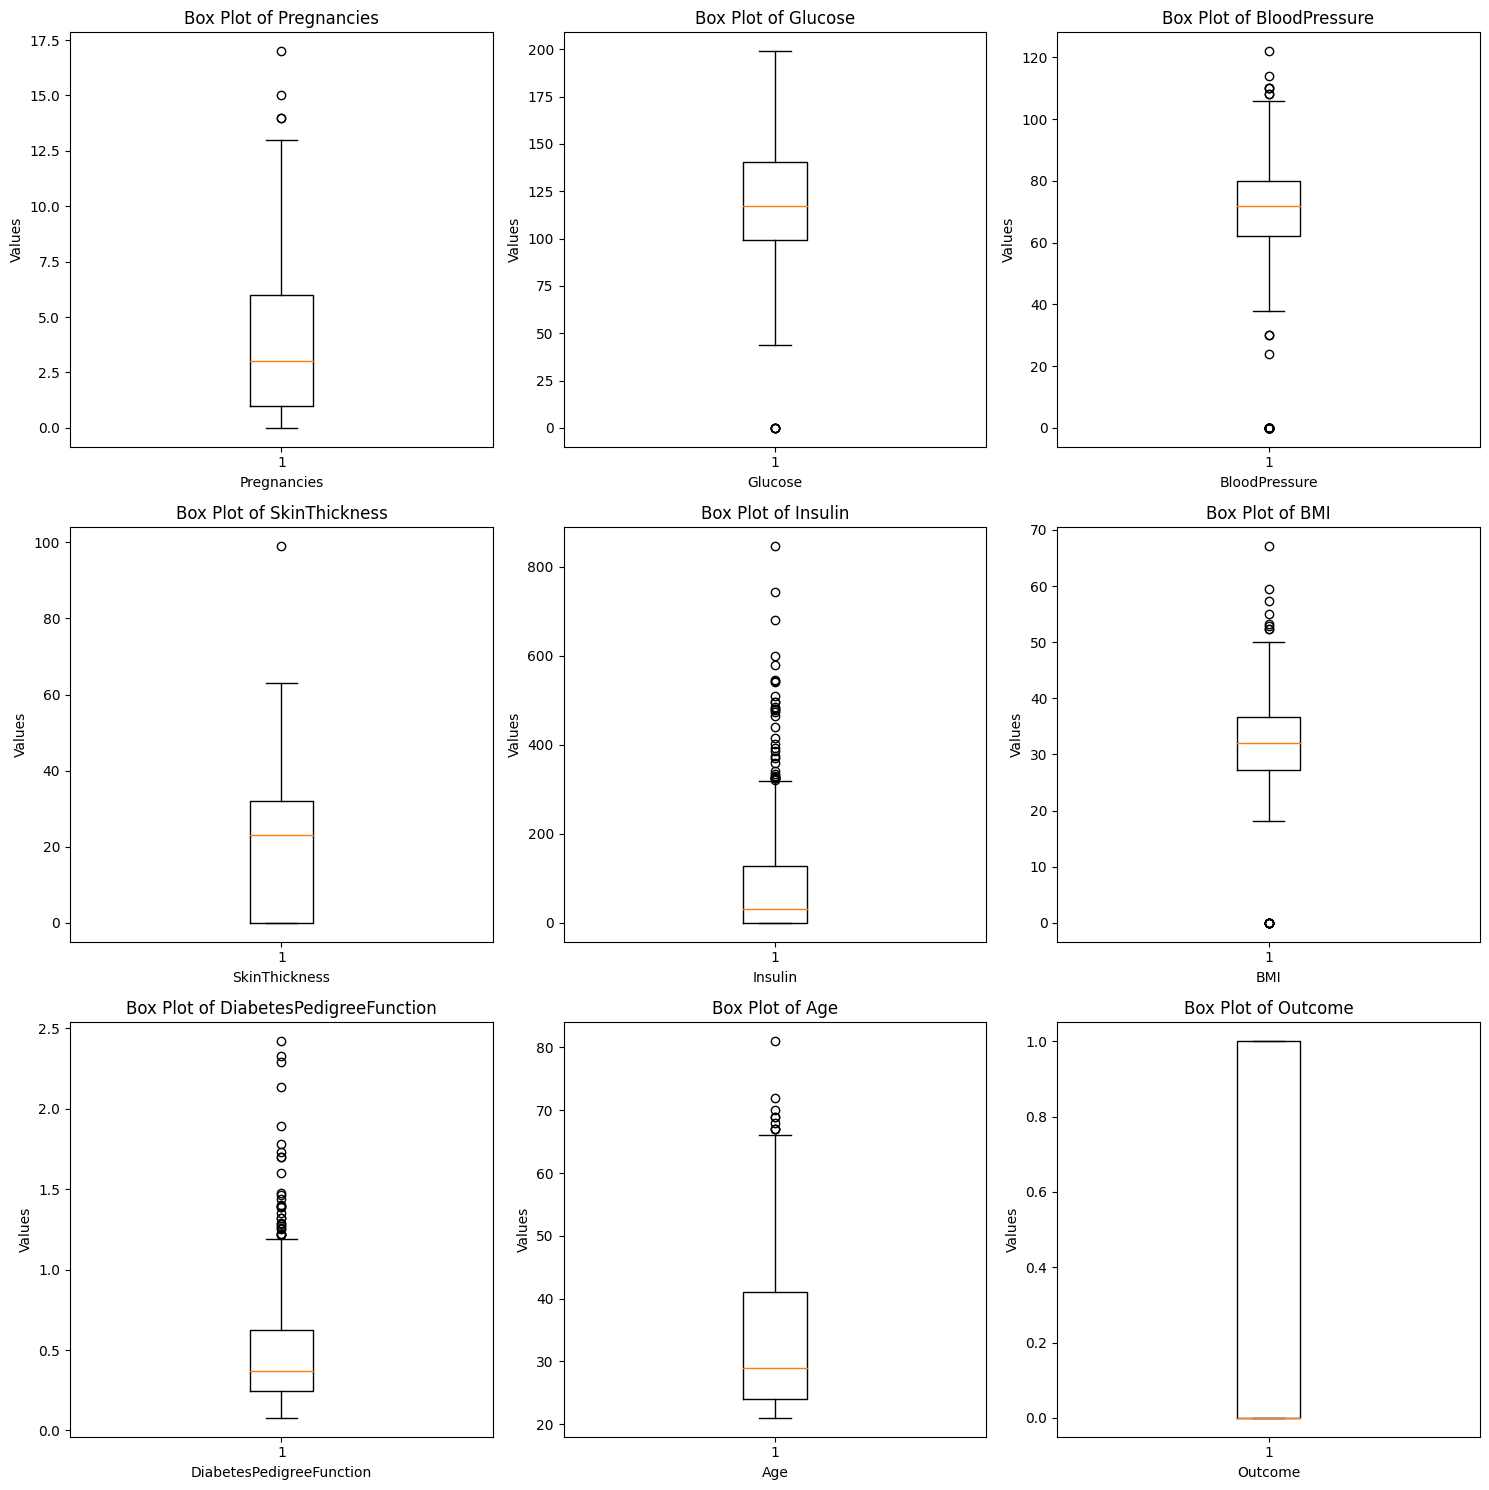

In [174]:
# Get list of features
features = diabetes_dataset.columns.tolist()

# Calculate the number of rows and columns for subplots
num_rows = 3
num_cols = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array
axes = axes.flatten()

# Create separate box plots for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    ax.boxplot(diabetes_dataset[feature])
    ax.set_title('Box Plot of {}'.format(feature))
    ax.set_xlabel('{}'.format(feature))
    ax.set_ylabel('Values')

# Hide any extra subplots if the number of features is less than 9
for j in range(len(features), num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Treat to the outliers

In our analysis to predict diabetes, we have chosen not to treat outliers in the dataset.
Since outliers may contain valuable information relevant to the prediction task, such as DiabetesPedigreeFunction or insulin levels that could be indicative of diabetes, we have opted to retain them in our analysis. By keeping outliers, we aim to capture the full range of variability in the data, which may contribute to the accuracy and robustness of our predictive models.



### Train Test Split

In [175]:
# Separate the data and labels
x = diabetes_dataset.drop('Outcome',axis=1)
y = diabetes_dataset['Outcome']

# print x and y
print(x)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


### Treat for Imbalance dataset

In [176]:
# check the count of the target variable
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [177]:
# Apply SMOTE
smote = SMOTE()
x_balanced, y_balanced = smote.fit_resample(x, y)

# Check the balanced target variable
print(pd.Series(y_balanced).value_counts())

# Check the x_balanced
print(x_balanced)

Outcome
1    500
0    500
Name: count, dtype: int64
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0              6      148             72             35        0  33.600000   
1              1       85             66             29        0  26.600000   
2              8      183             64              0        0  23.300000   
3              1       89             66             23       94  28.100000   
4              0      137             40             35      168  43.100000   
..           ...      ...            ...            ...      ...        ...   
995            3      157             69             29      327  35.231892   
996            6      146             89             25      479  31.110435   
997            7      163             88              0        0  30.727504   
998            3      173             82             24      160  31.365758   
999            7      153             77             32        0  32.546891   


In [178]:
diabetes_indicators = pd.DataFrame(x_balanced, columns=x.columns)
diabetes_indicators['Outcome'] = y_balanced

# Check the class distribution after applying SMOTE
diabetes_counts = diabetes_indicators['Outcome'].value_counts()

# Print the counts
for value, count in diabetes_counts.items():
    print(f"Count {value}: {count}")


Count 1: 500
Count 0: 500


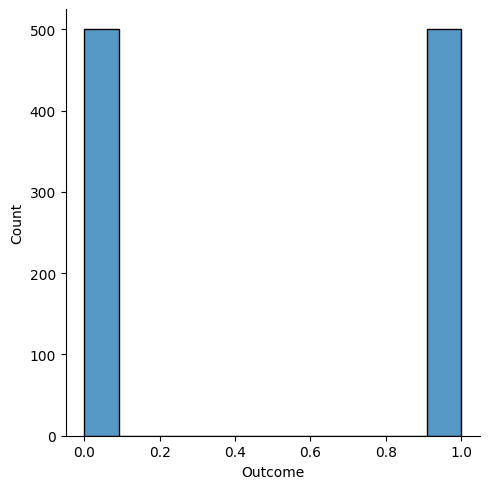

In [179]:
#Visualization to get idea about lables in Target Variable after Smote
import seaborn as sns
sns.displot(diabetes_indicators['Outcome'])

In [180]:
diabetes_indicators.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,4.045000,126.018000,69.773000,20.738000,84.793000,32.736158,0.489805,34.292000,0.50000
std,3.369619,32.829917,19.420469,16.133308,123.387766,7.478839,0.323174,11.587709,0.50025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.00000
25%,1.000000,102.750000,64.000000,0.000000,0.000000,28.300000,0.256000,25.000000,0.00000
50%,3.000000,122.000000,72.000000,24.000000,0.000000,32.800000,0.398500,31.000000,0.50000
75%,6.000000,148.000000,80.000000,33.000000,136.250000,37.056576,0.647398,42.000000,1.00000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.00000


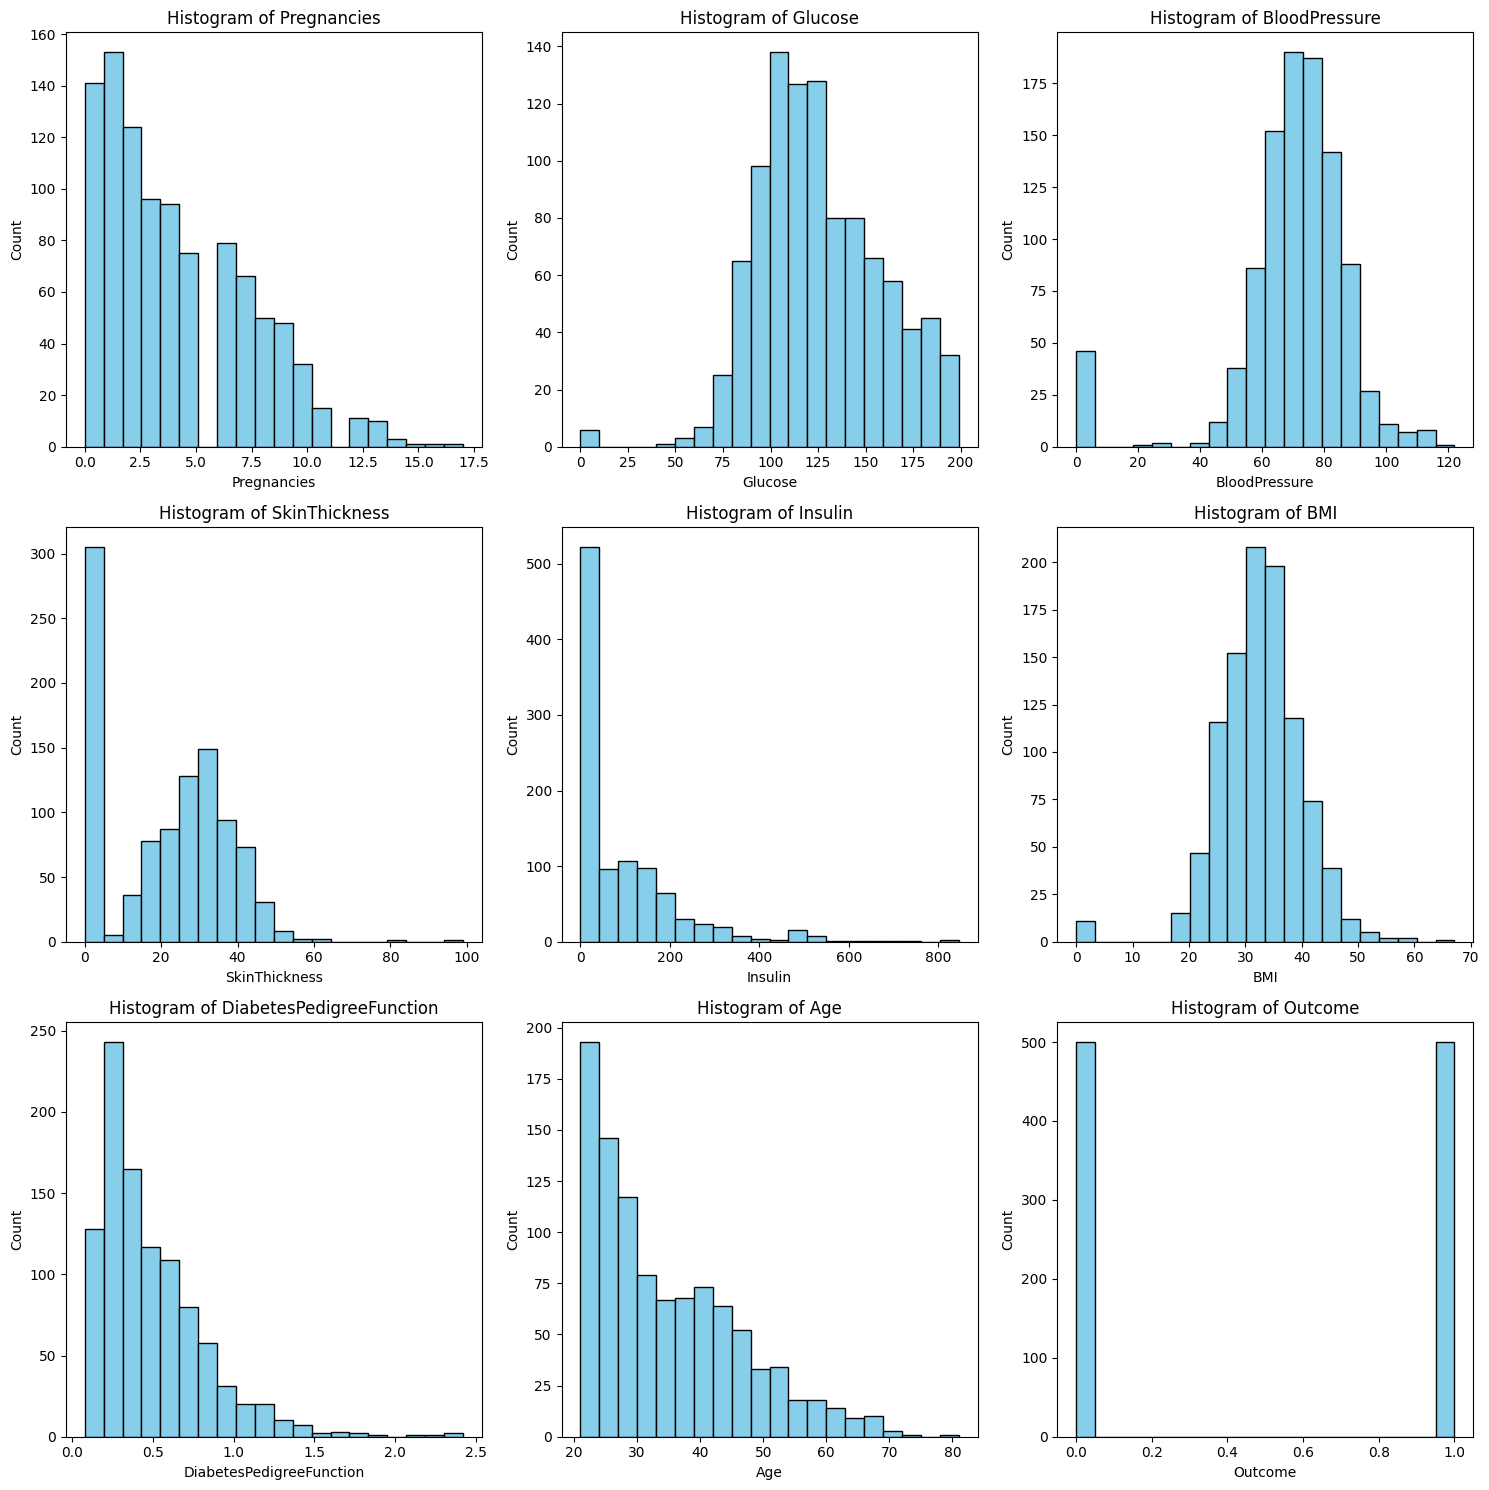

In [181]:
feature_names = diabetes_indicators.columns

# Create subplots for each feature
num_features = len(feature_names)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_features + num_cols - 1) // num_cols  # Number of rows needed

plt.figure(figsize=(15, 5*num_rows))

for i, feature in enumerate(feature_names, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.hist(diabetes_indicators[feature], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()

### Correlation Matrix

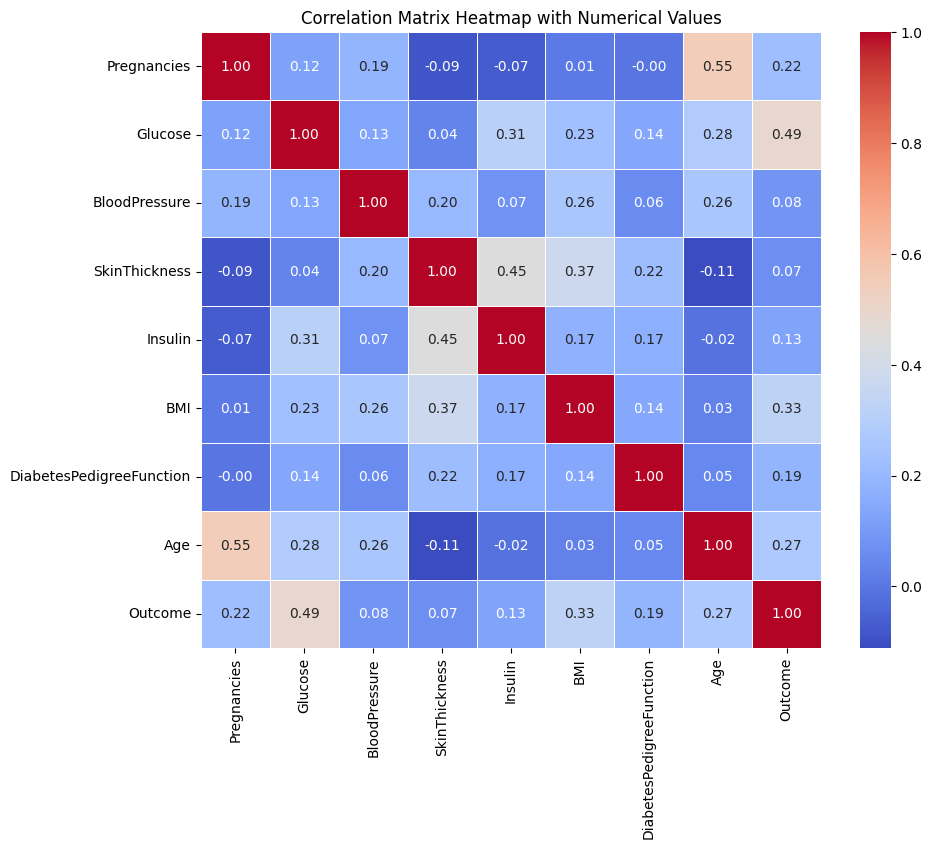

In [182]:
# Plot the correlation matrix as a heatmap
correlation_matrix = diabetes_indicators.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap with Numerical Values')
plt.show()

In [183]:
# separating the data and labels
x_balanced = diabetes_indicators.drop(columns = 'Outcome', axis=1)
y_balanced = diabetes_indicators['Outcome']

##Feature Scaling

### Data Standadization

In [184]:
scaler = StandardScaler()
scaler.fit(x_balanced)

StandardScaler()

In [185]:
standardized_data = scaler.transform(x_balanced)

# print the data
standardized_data

array([[ 0.58047467,  0.66990724,  0.1147302 , ...,  0.11556261,
         0.4247363 ,  1.3562525 ],
       [-0.90411528, -1.25003435, -0.19437676, ..., -0.82087991,
        -0.42972118, -0.28423626],
       [ 1.17431065,  1.73654145, -0.29741242, ..., -1.26234567,
         0.56405002, -0.19789475],
       ...,
       [ 0.87739266,  1.12703618,  0.93901543, ..., -0.26871267,
        -0.15642186,  1.61527704],
       [-0.3102793 ,  1.43178882,  0.62990847, ..., -0.18332873,
         1.60355106,  1.44259401],
       [ 0.87739266,  0.82228355,  0.37231934, ..., -0.0253197 ,
        -0.07517313,  0.92454493]])

In [186]:
# again assign the standardized data into X variable
X = standardized_data

Y = y_balanced

### Divide the data into two parts

In [187]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, stratify =Y , random_state = 2)

In [188]:
# check the split

print(f'Original X : {X.shape}')
print(f'Original X : {Y.shape}')
print(f'Traing X   : {x_train.shape}')
print(f'Testing X  : {x_test.shape}')
print(f'Traing X   : {y_train.shape}')
print(f'Testing X  : {y_test.shape}')

Original X : (1000, 8)
Original X : (1000,)
Traing X   : (800, 8)
Testing X  : (200, 8)
Traing X   : (800,)
Testing X  : (200,)


## Training the model

### Using SVC (Support Vector Classifier)

In [189]:
# import the svc library
from sklearn import svm

# Train the model
model_svc = svm.SVC(kernel = 'linear')
model_svc.fit(x_train,y_train)

SVC(kernel='linear')

### Using Random Forest

In [190]:
# import the svc library
from sklearn.ensemble import RandomForestClassifier


max_depth_value=5


# Train the model
model_RF = RandomForestClassifier(n_estimators=500,max_depth=max_depth_value)
model_RF.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=500)

## Model evaluation

### Using accuracy score

In [191]:
# for svc model

# for train data
pred_svc_train = model_svc.predict(x_train)
accuracyScore_svc_train = accuracy_score(pred_svc_train,y_train)
print('Accuracy score of the train data using SVC           : ', accuracyScore_svc_train)


# for test data
pred_svc = model_svc.predict(x_test)
accuracyScore_svc = accuracy_score(pred_svc,y_test)
print('Accuracy score of the test data using SVC            : ', accuracyScore_svc)


# for Fandom Forest model

# for train data
pred_RF_train = model_RF.predict(x_train)
accuracyScore_RF_train = accuracy_score(pred_RF_train,y_train)
print('Accuracy score of the train data using RF  : ', accuracyScore_RF_train)

# for test data
pred_RF = model_RF.predict(x_test)
accuracyScore_RF = accuracy_score(pred_RF,y_test)
print('Accuracy score of the test data using RF   : ', accuracyScore_RF)




Accuracy score of the train data using SVC           :  0.7625
Accuracy score of the test data using SVC            :  0.765
Accuracy score of the train data using RF  :  0.85625
Accuracy score of the test data using RF   :  0.805


### confusion matrix, classification report, and accuracy score to assess its performance.



In [192]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Metrics for Support Vector Machine')
print('----------------------------------------------------')
print("Confusion Matrix :")
print(confusion_matrix(y_test,pred_svc))
print('----------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,pred_svc))
print('----------------------------------------------------')
print("accuracy score :",accuracy_score(y_test, pred_svc))

Metrics for Support Vector Machine
----------------------------------------------------
Confusion Matrix :
[[77 23]
 [24 76]]
----------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       100
           1       0.77      0.76      0.76       100

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.77      0.76       200

----------------------------------------------------
accuracy score : 0.765


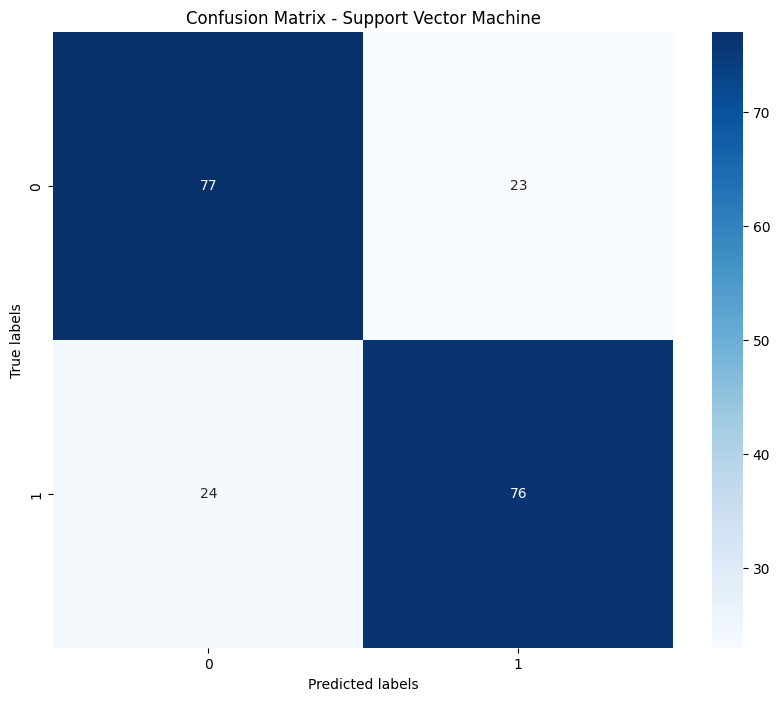

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get confusion matrix
cm = confusion_matrix(y_test, pred_svc)

# Define the unique class labels
classes = [0, 1]  # Replace [0, 1] with your actual unique class labels

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Support Vector Machine')
plt.show()



In [194]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Metrics for Random Forest')
print('----------------------------------------------------')
print("Confusion Matrix :")
print(confusion_matrix(y_test,pred_RF))
print('----------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,pred_RF))
print('----------------------------------------------------')
print("accuracy score :",accuracy_score(y_test, pred_RF))

Metrics for Random Forest
----------------------------------------------------
Confusion Matrix :
[[77 23]
 [16 84]]
----------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       100
           1       0.79      0.84      0.81       100

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200

----------------------------------------------------
accuracy score : 0.805


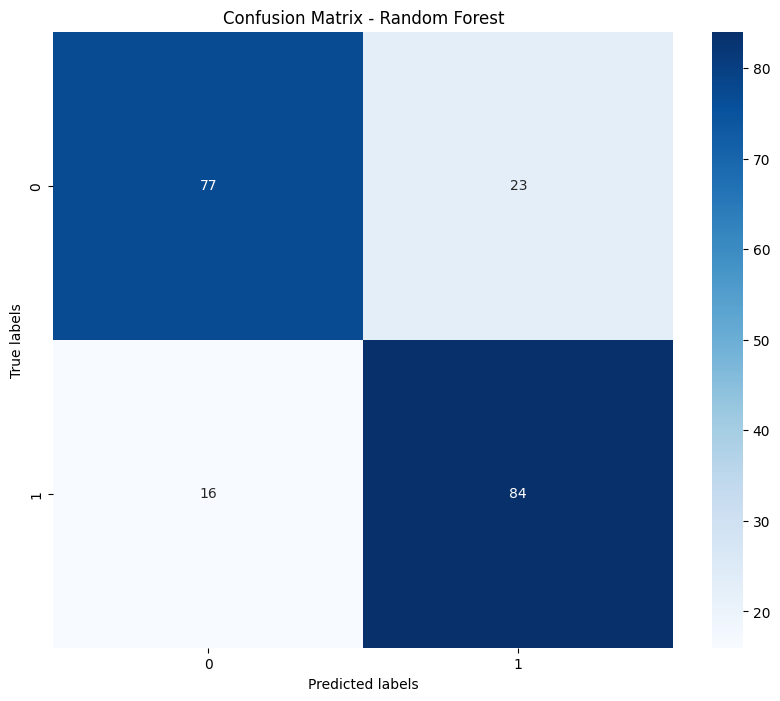

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get confusion matrix
cm = confusion_matrix(y_test, pred_RF)

# Define the unique class labels
classes = [0, 1]  # Replace [0, 1] with your actual unique class labels

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()


## Making the predictive system

In [196]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)



### Predict the diabetes using SVM

In [197]:
# Prediction using SVM classifier
svm_prediction = model_svc.predict(input_data_reshaped)
print("SVM Classifier Prediction:", svm_prediction[0])

if (svm_prediction[0] == 0):
  print('SVM : The person is not diabetic')
else:
  print('SVM: The person is diabetic')


SVM Classifier Prediction: 1
SVM: The person is diabetic


### Predict the diabetes using RF

In [198]:
rf_prediction = model_RF.predict(input_data_reshaped)
print("Random Forest Classifier Prediction:", rf_prediction[0])

# Output prediction interpretation
if rf_prediction[0] == 0:
    print('Random Forest: The person is not diabetic')
else:
    print('Random Forest: The person is diabetic')

Random Forest Classifier Prediction: 1
Random Forest: The person is diabetic


### Saving the trained SVM model & Random Forest model

In [199]:
import pickle

# Save the svm trained model using pickle
filename = 'DiabetesPrediction_svm_model.sav'
pickle.dump(model_svc, open(filename,'wb'))

# Save the RF trained model using pickle
filename = 'DiabetesPrediction_rf_model.sav'
pickle.dump(model_RF, open(filename, 'wb'))

### Loading the Save SVM model and Testing

In [200]:
load_model_svm = pickle.load(open('DiabetesPrediction_svm_model.sav','rb'))

In [201]:
# Prediction using SVM classifier
svm_prediction = load_model_svm.predict(input_data_reshaped)
print("SVM Classifier Prediction:", svm_prediction[0])

if (svm_prediction[0] == 0):
  print('SVM : The person is not diabetic')
else:
  print('SVM: The person is diabetic')

SVM Classifier Prediction: 1
SVM: The person is diabetic


### Loading the Save RF model and Testing

In [202]:
load_model_RF = pickle.load(open('DiabetesPrediction_rf_model.sav','rb'))

In [203]:
# Prediction using SVM classifier
svm_prediction = load_model_RF.predict(input_data_reshaped)
print("SVM Classifier Prediction:", svm_prediction[0])

if (svm_prediction[0] == 0):
  print('SVM : The person is not diabetic')
else:
  print('SVM: The person is diabetic')

SVM Classifier Prediction: 1
SVM: The person is diabetic
